In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import kagglehub
from kagglehub import KaggleDatasetAdapter

%matplotlib inline

In [104]:
temp_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "berkeleyearth/climate-change-earth-surface-temperature-data",
  "GlobalTemperatures.csv",
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

C:\Users\jdorn\AppData\Local\Temp\ipykernel_984\4090639631.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  temp_df = kagglehub.load_dataset(


In [105]:
temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
temp_df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [107]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [108]:
temp_df[temp_df.isna().any(axis=1)]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1195,1849-08-01,13.603,0.902,NaN,NaN,NaN,NaN,NaN,NaN
1196,1849-09-01,11.093,0.568,NaN,NaN,NaN,NaN,NaN,NaN
1197,1849-10-01,8.890,0.733,NaN,NaN,NaN,NaN,NaN,NaN
1198,1849-11-01,5.778,1.313,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
temp_df.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [110]:
temp_df[temp_df['LandAverageTemperature'].isnull()]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
10,1750-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1751-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1751-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1751-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1751-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1751-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1752-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1752-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1752-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1752-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
temp_df.dropna(subset=['LandAverageTemperature'], inplace=True)

In [112]:
temp_df_copy = temp_df.copy()

In [113]:
df = temp_df_copy[['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty']]

In [114]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072


In [115]:
## Check if there are duplicate rows
df['dt'].duplicated().sum()

np.int64(0)

In [116]:
# Convert 'dt' to datetime
df['dt'] = pd.to_datetime(df['dt'], errors='coerce')

# Create a time variable (years since start)
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['time_numeric'] = (df['dt'] - df['dt'].min()).dt.days / 365.25  # Convert to years

# Remove any remaining NaN values
df_clean = df.dropna(subset=['LandAverageTemperature', 'time_numeric'])

C:\Users\jdorn\AppData\Local\Temp\ipykernel_984\3143281856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt'] = pd.to_datetime(df['dt'], errors='coerce')
C:\Users\jdorn\AppData\Local\Temp\ipykernel_984\3143281856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['dt'].dt.year
C:\Users\jdorn\AppData\Local\Temp\ipykernel_984\3143281856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [117]:
# Group data by year
annual = (
    df_clean.groupby('year')[['LandAverageTemperature','LandAverageTemperatureUncertainty']]
    .mean()
    .reset_index()
)

annual.head()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [118]:
# Decade dataframe for decade analysis
decade = df.copy()
decade['decade'] = (decade['dt'].dt.year // 10) * 10
decade = (
    decade.groupby('decade')[['LandAverageTemperature','LandAverageTemperatureUncertainty']]
    .mean()
    .reset_index()
)

C:\Users\jdorn\AppData\Local\Temp\ipykernel_984\3098902990.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(x=df[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']], vert=True, patch_artist=True, labels=['Land Average Temperature', 'Land Average Temperature Uncertainty'])


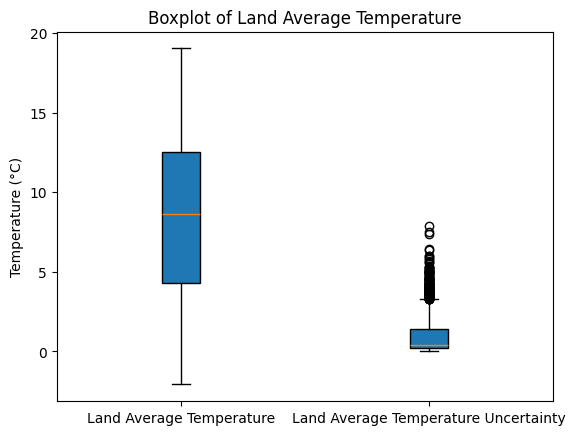

In [119]:
plt.boxplot(x=df[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']], vert=True, patch_artist=True, labels=['Land Average Temperature', 'Land Average Temperature Uncertainty'])
plt.title('Boxplot of Land Average Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x15428dc9010>,
 'caps': [<matplotlib.lines.Line2D at 0x15428dc9670>,
 'boxes': [<matplotlib.lines.Line2D at 0x15428dc8ce0>],
 'medians': [<matplotlib.lines.Line2D at 0x154230a3d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x15420e36690>],
 'means': []}

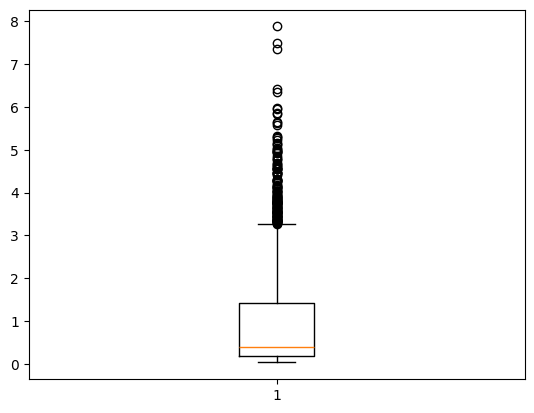

In [120]:
plt.boxplot(x=df['LandAverageTemperatureUncertainty'])

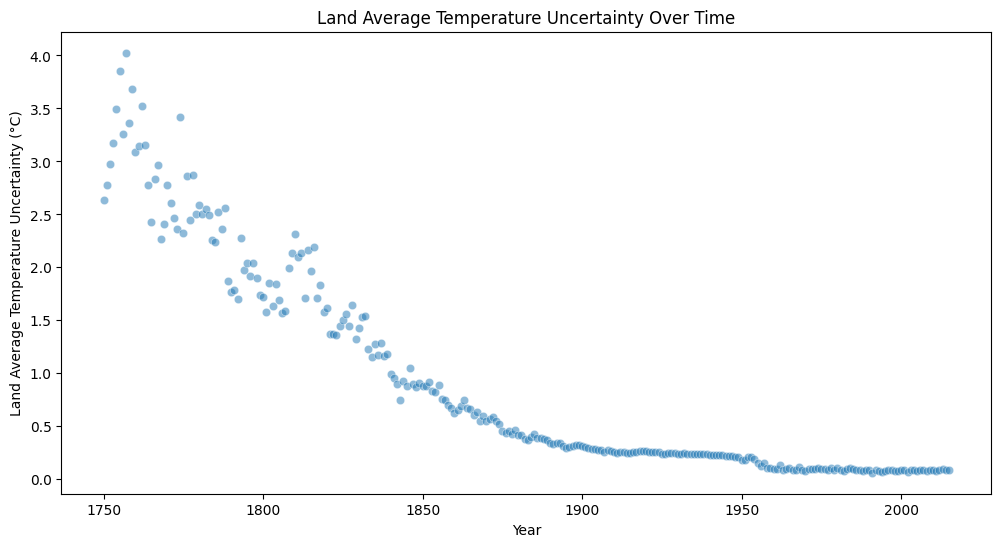

In [121]:
# Scatter plot land average temperature uncertainty across time

plt.figure(figsize=(12, 6))
sns.scatterplot(data=annual, x='year', y='LandAverageTemperatureUncertainty', alpha=0.5)
plt.title('Land Average Temperature Uncertainty Over Time')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature Uncertainty (°C)')
plt.show()

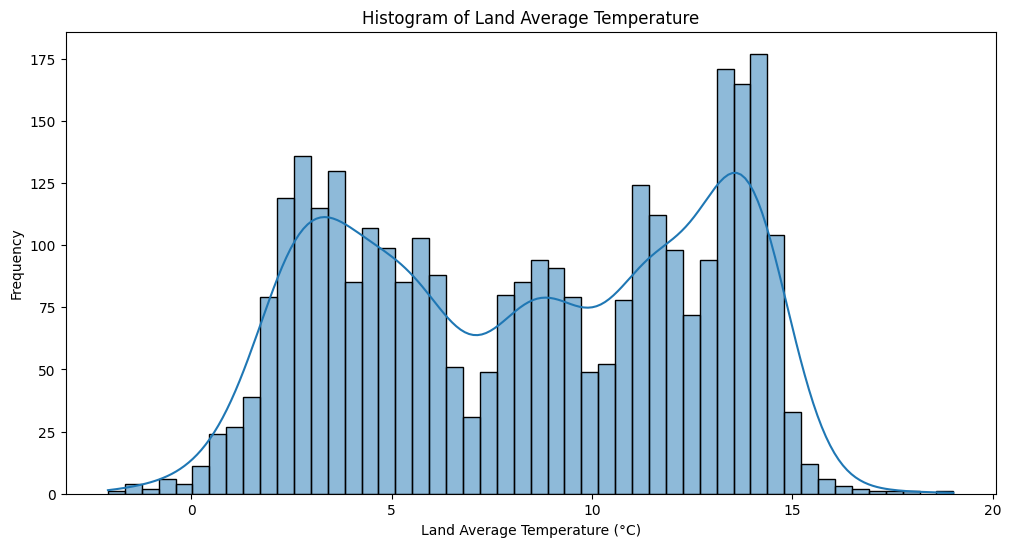

In [122]:
## Histogram of Land Average Temperature by date

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='LandAverageTemperature', bins=50, kde=True)
plt.title('Histogram of Land Average Temperature')
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

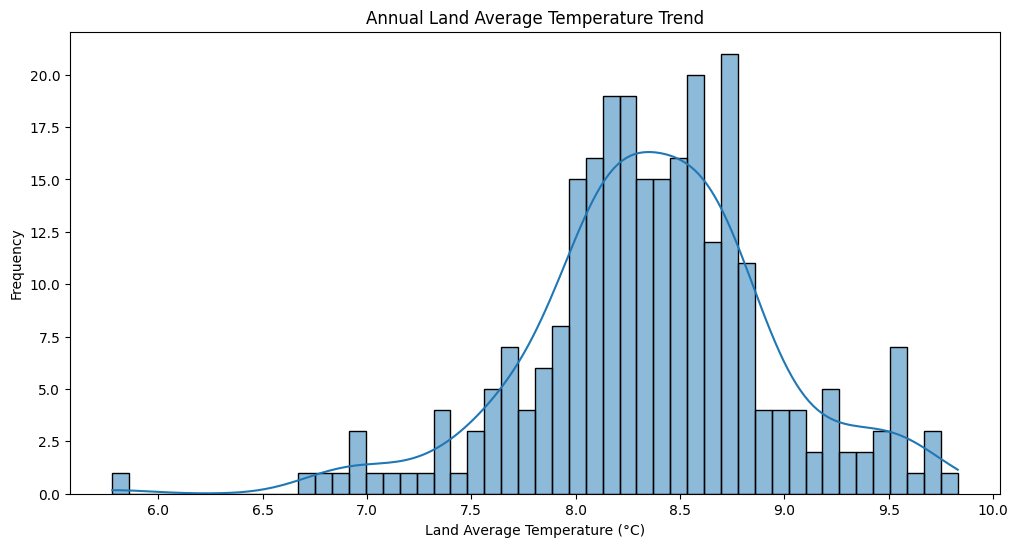

In [123]:
# Annual Land Average Temperature Trend

plt.figure(figsize=(12, 6))
sns.histplot(data=annual, x='LandAverageTemperature', bins=50, kde=True)
plt.title('Annual Land Average Temperature Trend')
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

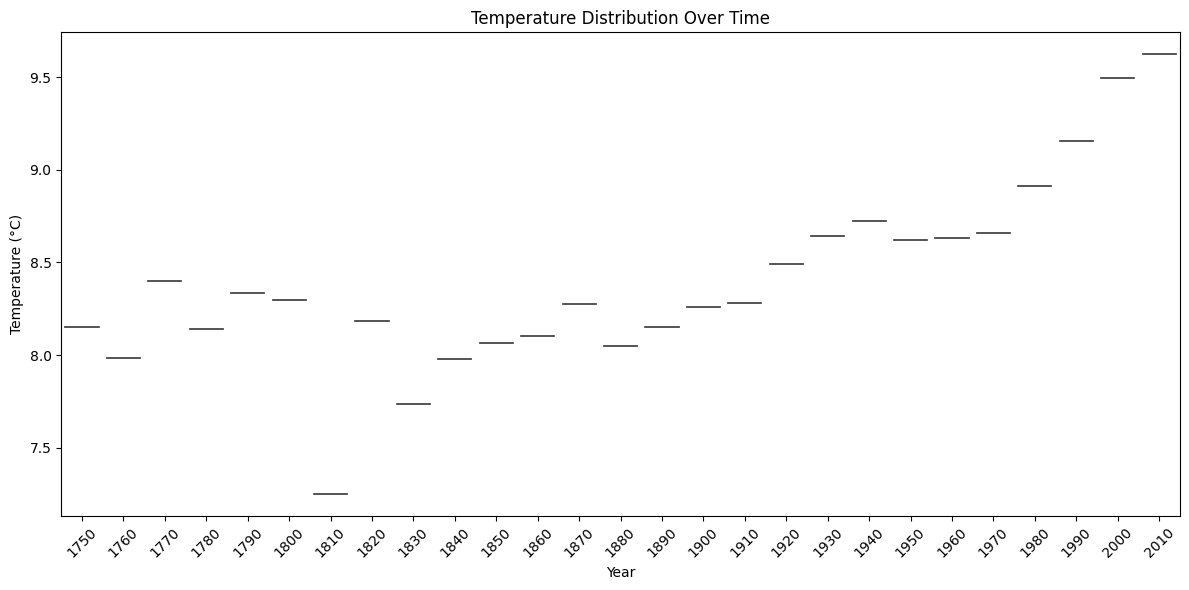

In [124]:
# Convert dt column to datetime

# Create figure with subplots
fig = plt.figure(figsize=(12, 6))

# Plot 2: Temperature distribution over time using a violin plot


sns.violinplot(data=decade, x='decade', y='LandAverageTemperature')
plt.title('Temperature Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [125]:
df.corr()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,year,month,time_numeric
dt,1.000000,0.082361,-0.810930,0.999993,0.006126,1.000000
LandAverageTemperature,0.082361,1.000000,-0.204191,0.081449,0.245935,0.082361
LandAverageTemperatureUncertainty,-0.810930,-0.204191,1.000000,-0.810619,-0.087085,-0.810930
year,0.999993,0.081449,-0.810619,1.000000,0.002364,0.999993
month,0.006126,0.245935,-0.087085,0.002364,1.000000,0.006126
time_numeric,1.000000,0.082361,-0.810930,0.999993,0.006126,1.000000


### Indicator Analysis
- Decadal mean temperature
- Annual standard deviation

In [174]:
annual_std = (
    df.groupby('year')[['LandAverageTemperature','LandAverageTemperatureUncertainty']]
    .std()
    .reset_index()
)

annual_var = (
    df.groupby('year')[['LandAverageTemperature','LandAverageTemperatureUncertainty']]
    .var()
    .reset_index()
)

## Confidence Intervals
### Annual land average temperature
- Confirm the distribution with a QQ-Plot. Previously, we see a bell-shaped distribution.
- Because the annual standard deviation is unknown, we use the student distribution to compute the 95% confidence interval of the annual mean.

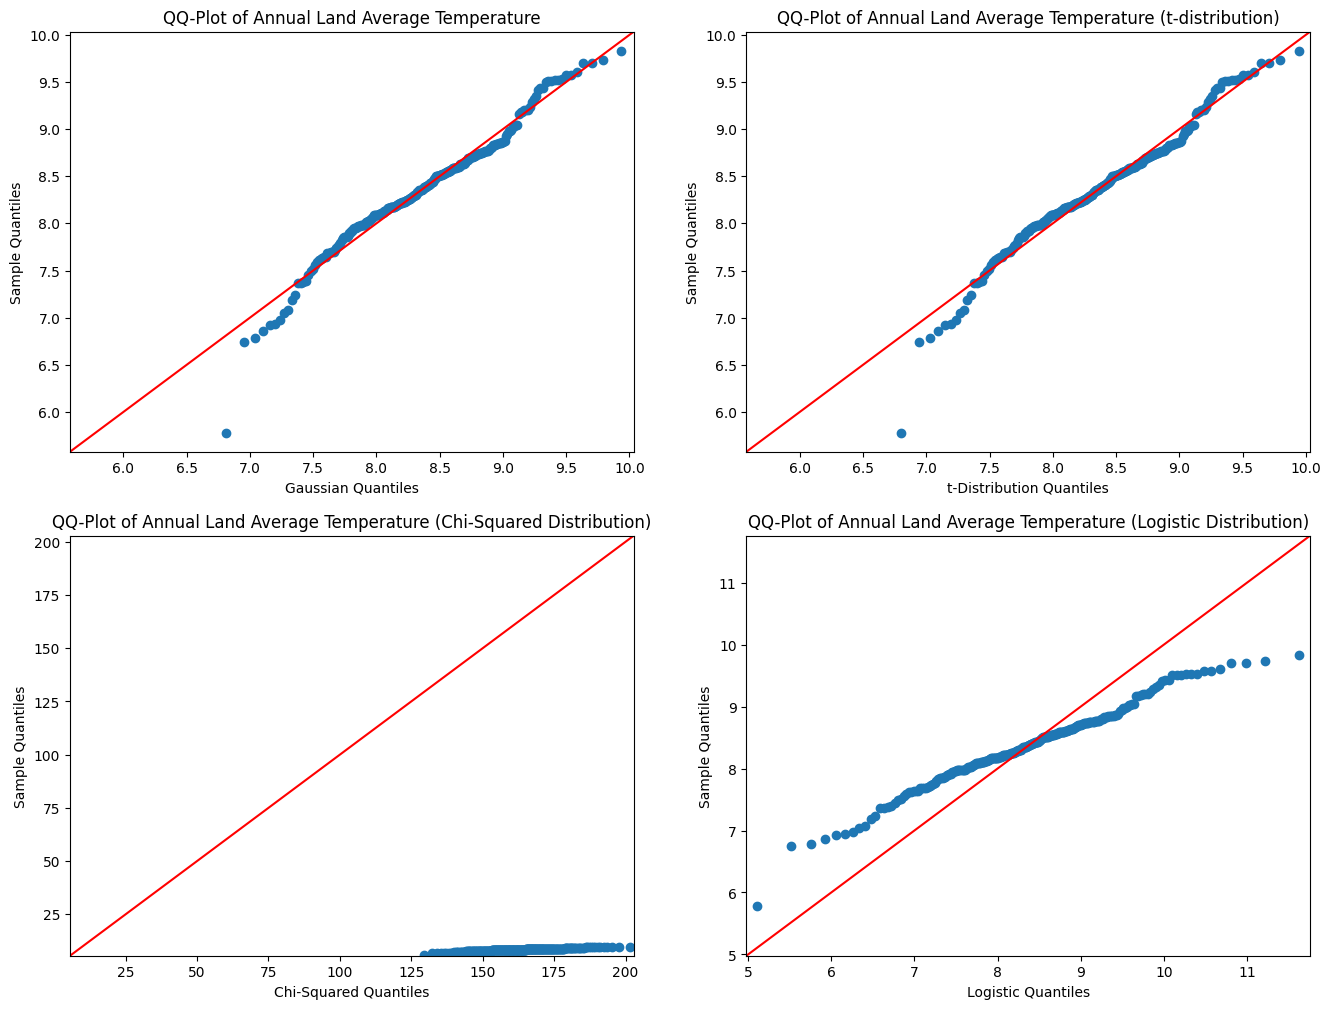

In [ ]:
# QQ-plots for Annual Land Average Temperature
n = len(annual['LandAverageTemperature'])
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sm.qqplot(annual['LandAverageTemperature'], dist=stats.norm, loc=np.mean(annual['LandAverageTemperature']), 
          scale=np.std(annual['LandAverageTemperature']), line ='45', ax=axes[0, 0])
axes[0, 0].set_title('QQ-Plot of Annual Land Average Temperature')
axes[0, 0].set_xlabel('Gaussian Quantiles')
axes[0, 0].set_ylabel('Sample Quantiles')

sm.qqplot(annual['LandAverageTemperature'], dist=stats.t, distargs=(n-1,), loc=np.mean(annual['LandAverageTemperature']),
            scale=np.std(annual['LandAverageTemperature']), line ='45', ax=axes[0, 1])
axes[0, 1].set_title('QQ-Plot of Annual Land Average Temperature (t-distribution)')
axes[0, 1].set_xlabel('t-Distribution Quantiles')
axes[0, 1].set_ylabel('Sample Quantiles')

sm.qqplot(annual['LandAverageTemperature'], dist=stats.chi2, distargs=(n-1,), loc=np.mean(annual['LandAverageTemperature']),
            scale=np.std(annual['LandAverageTemperature']), line ='45', ax=axes[1, 0])
axes[1, 0].set_title('QQ-Plot of Annual Land Average Temperature (Chi-Squared Distribution)')
axes[1, 0].set_xlabel('Chi-Squared Quantiles')
axes[1, 0].set_ylabel('Sample Quantiles')

sm.qqplot(annual['LandAverageTemperature'], dist=stats.logistic, loc=np.mean(annual['LandAverageTemperature']),
            scale=np.std(annual['LandAverageTemperature']), line ='45', ax=axes[1, 1])
axes[1, 1].set_title('QQ-Plot of Annual Land Average Temperature (Logistic Distribution)')
axes[1, 1].set_xlabel('Logistic Quantiles')
axes[1, 1].set_ylabel('Sample Quantiles')

plt.show()



In [178]:
alpha = 0.05
mu_hat = np.mean(annual['LandAverageTemperature'])
sigma_hat = np.std(annual['LandAverageTemperature'], ddof=1)
se_hat = stats.sem(annual['LandAverageTemperature'])

# Critical t-value
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)

# Margin of error
a = t_crit*sigma_hat/np.sqrt(n)

# Confidence interval
CI_annual_mean =[mu_hat - a, mu_hat + a]

print(f"95% Confidence Interval for Annual Land Average Temperature Mean: \n({CI_annual_mean[0]:.4f}, {CI_annual_mean[1]:.4f}) °C")
print(f"Sample mean: {mu_hat:.4f} °C (includes in the confidence interval)")

95% Confidence Interval for Annual Land Average Temperature Mean: 
(8.2987, 8.4400) °C
Sample mean: 8.3693 °C (includes in the confidence interval)


### Annual standard deviation temperature
- Associate the distribution with a statistic law. 
    - Plot its histogram : A long rigth tail is observed. The distribution is asymmetric.
    - Plot its qq-plots : None of the classical parametric models (χ², F, lognormal, gamma) provides a perfect fit.
- distribution-free bootstrap procedures to compute confidence intervals for annual indicators and apply Extreme Value Theory (POT / GPD) to model tail behaviour.

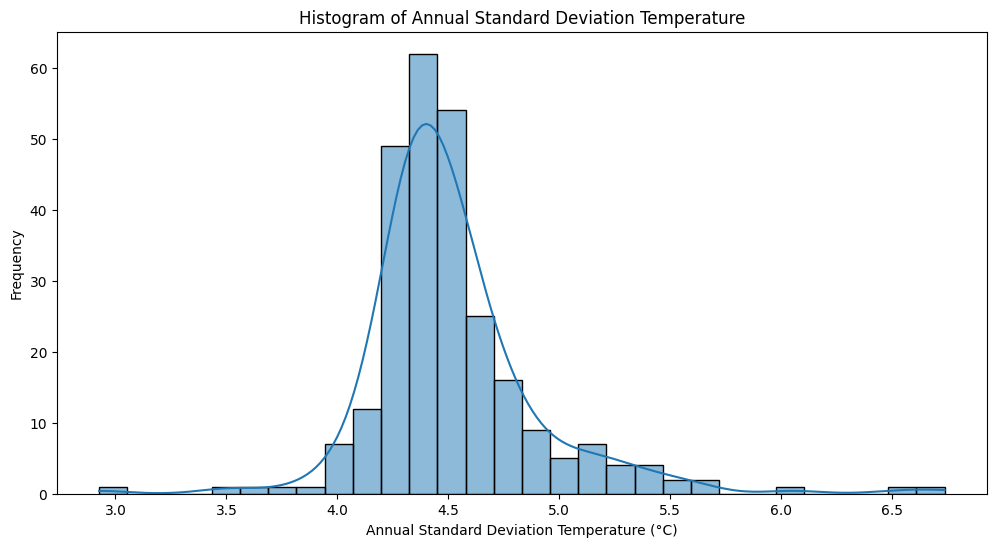

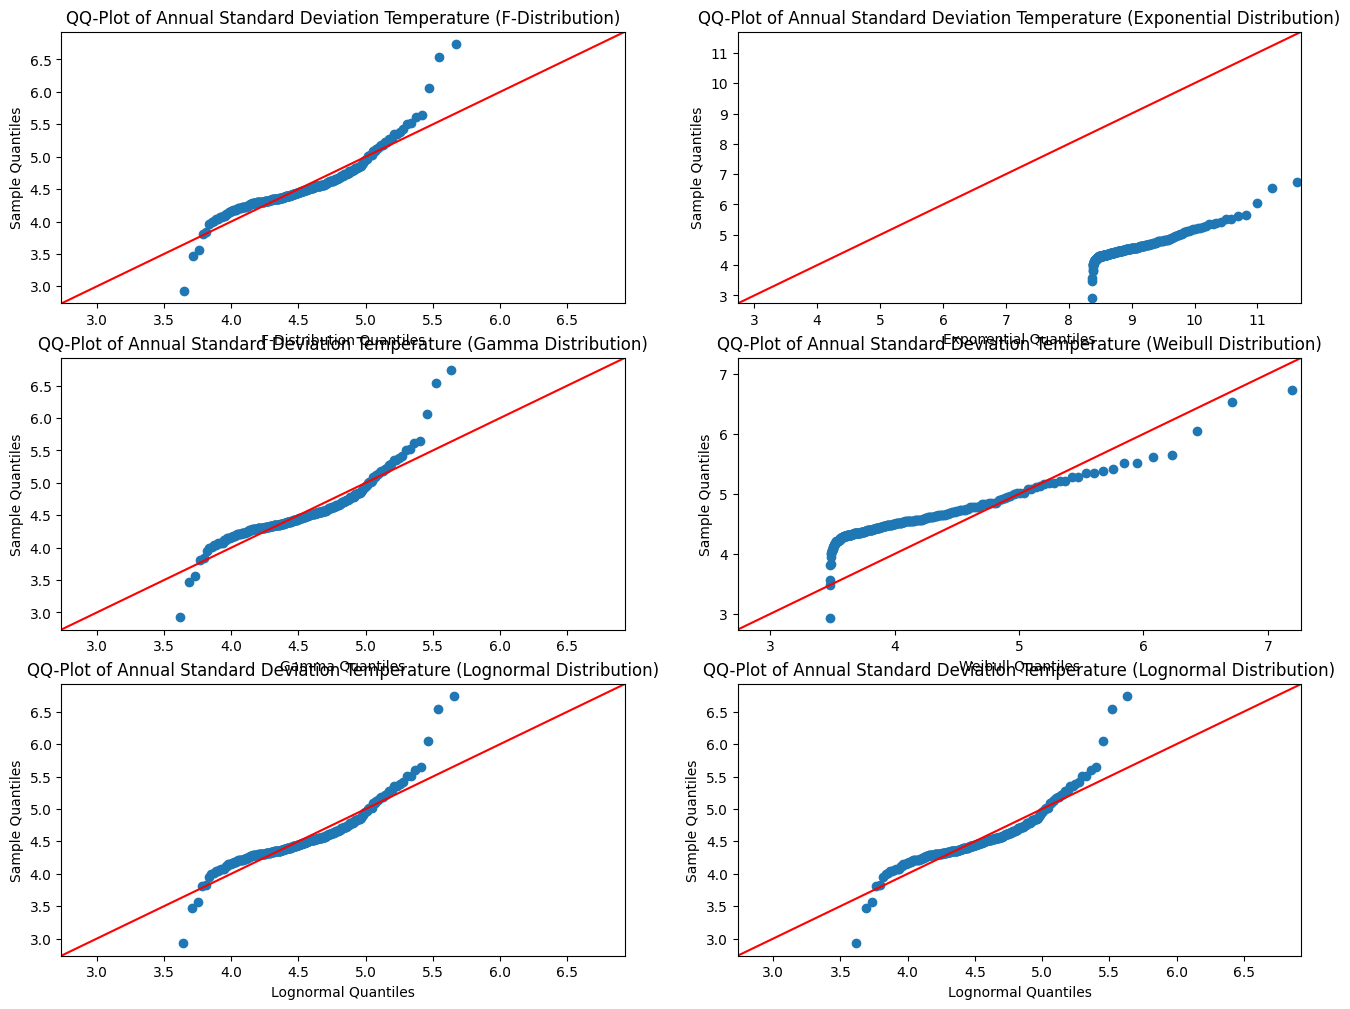

In [204]:
## Histogram of Annual Standard Deviation Temperature
plt.figure(figsize=(12,6))
sns.histplot(data=annual_std, x='LandAverageTemperature', bins=30, kde=True)
plt.title('Histogram of Annual Standard Deviation Temperature')
plt.xlabel('Annual Standard Deviation Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# QQ-plots for Annual Standard Deviation Temperature
n = len(annual_std['LandAverageTemperature'])
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Fit MLE parameters for F-distribution
dfn, dfd, loc, scale = stats.f.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.f, distargs=(dfn,dfd,), loc=loc,
            scale=scale, line ='45', ax=axes[0, 0])
axes[0, 0].set_title('QQ-Plot of Annual Standard Deviation Temperature (F-Distribution)')
axes[0, 0].set_xlabel('F-Distribution Quantiles')
axes[0, 0].set_ylabel('Sample Quantiles')


sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.expon, loc=np.mean(annual['LandAverageTemperature']),
            scale=np.std(annual['LandAverageTemperature']), line ='45', ax=axes[0, 1])
axes[0, 1].set_title('QQ-Plot of Annual Standard Deviation Temperature (Exponential Distribution)')
axes[0, 1].set_xlabel('Exponential Quantiles')
axes[0, 1].set_ylabel('Sample Quantiles')

# Fit MLE parameters for Gamma distribution
shape, loc, scale = stats.gamma.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.gamma, distargs=(shape,), loc=loc, scale=scale, line ='45', ax=axes[1, 0])
axes[1, 0].set_title('QQ-Plot of Annual Standard Deviation Temperature (Gamma Distribution)')
axes[1, 0].set_xlabel('Gamma Quantiles')
axes[1, 0].set_ylabel('Sample Quantiles')

# Fit MLE parameters for Weibull distribution
shape, loc, scale = stats.weibull_min.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.weibull_min, distargs=(shape,), loc=loc, scale=scale, line ='45', ax=axes[1, 1])
axes[1, 1].set_title('QQ-Plot of Annual Standard Deviation Temperature (Weibull Distribution)')
axes[1, 1].set_xlabel('Weibull Quantiles')
axes[1, 1].set_ylabel('Sample Quantiles')

# Fit MLE parameters for Lognormal distribution
shape, loc, scale = stats.lognorm.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.lognorm, distargs=(shape,), loc=loc, scale=scale, line ='45', ax=axes[2, 0])
axes[2, 0].set_title('QQ-Plot of Annual Standard Deviation Temperature (Lognormal Distribution)')
axes[2, 0].set_xlabel('Lognormal Quantiles')
axes[2, 0].set_ylabel('Sample Quantiles')

# Fit MLE parameters for Lognormal distribution
shape, loc, scale = stats.chi2.fit(annual_std['LandAverageTemperature'])

sm.qqplot(annual_std['LandAverageTemperature'], dist=stats.chi2, distargs=(shape,), loc=loc, scale=scale, line ='45', ax=axes[2, 1])
axes[2, 1].set_title('QQ-Plot of Annual Standard Deviation Temperature (Lognormal Distribution)')
axes[2, 1].set_xlabel('Lognormal Quantiles')
axes[2, 1].set_ylabel('Sample Quantiles')

plt.show()


## Hypothesis Testing: Are there significant changes in temperature over time?

**Null Hypothesis (H₀)**: There is no significant trend in global land temperatures over time (slope = 0)

**Alternative Hypothesis (H₁)**: There is a significant trend in global land temperatures over time (slope ≠ 0)

We'll use multiple statistical tests to evaluate this hypothesis.

In [128]:
from scipy import stats
from scipy.stats import linregress


# Remove any remaining NaN values
df_clean = df.dropna(subset=['LandAverageTemperature', 'time_numeric'])

print(f"Data range: {df_clean['dt'].min()} to {df_clean['dt'].max()}")
print(f"Total observations: {len(df_clean)}")
print(f"Years covered: {df_clean['year'].max() - df_clean['year'].min()}")

Data range: 1750-01-01 00:00:00 to 2015-12-01 00:00:00
Total observations: 3180
Years covered: 265


### Test 1: Linear Regression Analysis

Testing if there's a statistically significant linear trend in temperature over time.

In [129]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_clean['time_numeric'], 
                                                          df_clean['LandAverageTemperature'])

print("=" * 60)
print("LINEAR REGRESSION TEST")
print("=" * 60)
print(f"Slope: {slope:.6f} °C/year")
print(f"Intercept: {intercept:.4f} °C")
print(f"R-squared: {r_value**2:.6f}")
print(f"P-value: {p_value:.2e}")
print(f"Standard error: {std_err:.6f}")
print()

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"✓ REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"  There IS a statistically significant trend in temperature over time.")
    print(f"  Temperature is changing at a rate of {slope:.6f} °C/year")
    if slope > 0:
        print(f"  The trend is INCREASING (warming)")
    else:
        print(f"  The trend is DECREASING (cooling)")
else:
    print(f"✗ FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"  There is NO statistically significant trend in temperature over time.")

print("=" * 60)

LINEAR REGRESSION TEST
Slope: 0.004716 °C/year
Intercept: 7.7454 °C
R-squared: 0.006783
P-value: 3.31e-06
Standard error: 0.001012

✓ REJECT NULL HYPOTHESIS (p < 0.05)
  There IS a statistically significant trend in temperature over time.
  Temperature is changing at a rate of 0.004716 °C/year
  The trend is INCREASING (warming)


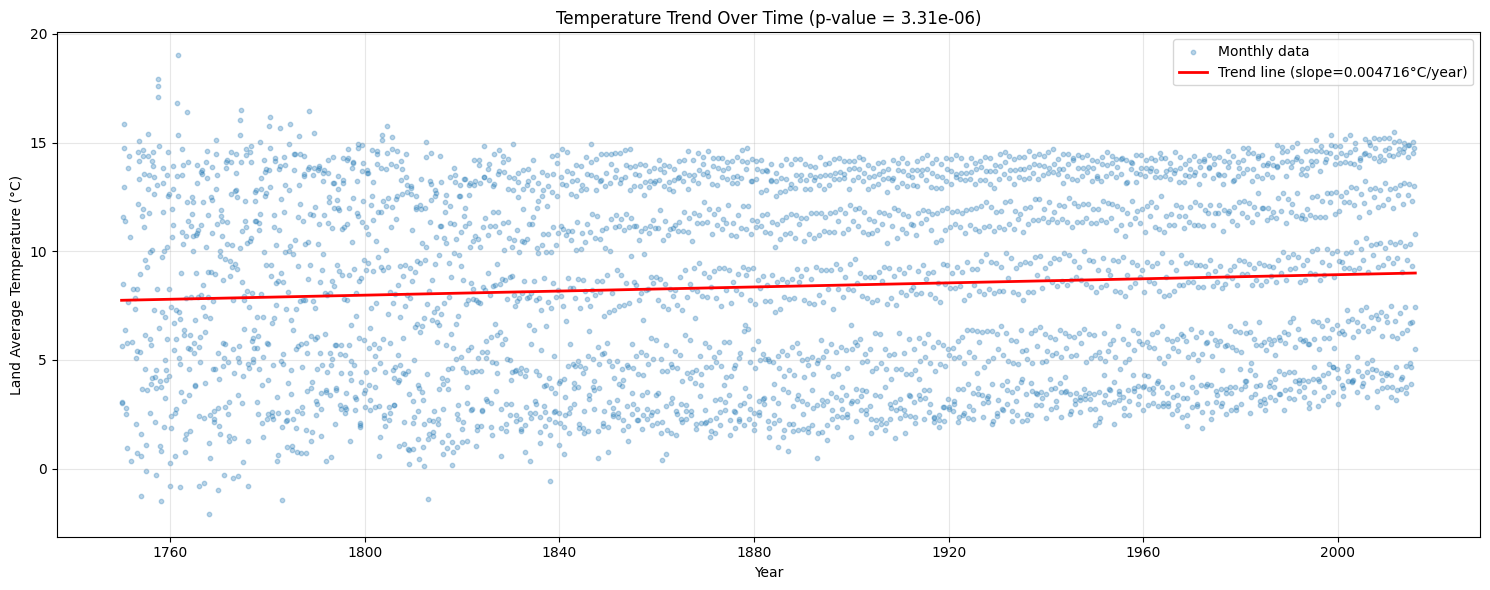

In [130]:
# Visualize the trend
plt.figure(figsize=(15, 6))

# Plot the data
plt.scatter(df_clean['dt'], df_clean['LandAverageTemperature'], 
            alpha=0.3, s=10, label='Monthly data')

# Plot the regression line
regression_line = slope * df_clean['time_numeric'] + intercept
plt.plot(df_clean['dt'], regression_line, 
         color='red', linewidth=2, label=f'Trend line (slope={slope:.6f}°C/year)')

plt.xlabel('Year')
plt.ylabel('Land Average Temperature (°C)')
plt.title(f'Temperature Trend Over Time (p-value = {p_value:.2e})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Test 2: Mann-Kendall Trend Test

A non-parametric test that doesn't assume linearity. Good for detecting monotonic trends.

In [131]:
# Install pymannkendall if needed (uncomment if not installed)
# !pip install pymannkendall

import pymannkendall as mk

# Perform Mann-Kendall test
result = mk.original_test(df_clean['LandAverageTemperature'])

print("=" * 60)
print("MANN-KENDALL TREND TEST")
print("=" * 60)
print(f"Test statistic (tau): {result.z:.4f}")
print(f"P-value: {result.p:.2e}")
print(f"Trend: {result.trend}")
print(f"Slope (Sen's slope): {result.slope:.6f} °C/observation")
print()

# Interpretation
if result.p < alpha:
    print(f"✓ REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"  There IS a statistically significant monotonic trend.")
    print(f"  Trend direction: {result.trend}")
else:
    print(f"✗ FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"  There is NO statistically significant monotonic trend.")

print("=" * 60)

MANN-KENDALL TREND TEST
Test statistic (tau): 5.4612
P-value: 4.73e-08
Trend: increasing
Slope (Sen's slope): 0.000406 °C/observation

✓ REJECT NULL HYPOTHESIS (p < 0.05)
  There IS a statistically significant monotonic trend.
  Trend direction: increasing


### Test 3: Comparing Early vs Recent Periods (Independent t-test)

Comparing temperatures from the first 50 years vs the last 50 years to test if there's a significant difference.

In [132]:
# Split data into early and recent periods
min_year = df_clean['year'].min()
max_year = df_clean['year'].max()

# Early period: first 50 years
early_period = df_clean[df_clean['year'] <= min_year + 50]['LandAverageTemperature']

# Recent period: last 50 years
recent_period = df_clean[df_clean['year'] >= max_year - 50]['LandAverageTemperature']

# Perform independent t-test
t_statistic, t_pvalue = stats.ttest_ind(early_period, recent_period)

print("=" * 60)
print("INDEPENDENT T-TEST (Early vs Recent Periods)")
print("=" * 60)
print(f"Early period: {min_year} - {min_year + 50}")
print(f"  Mean temperature: {early_period.mean():.4f} °C")
print(f"  Std deviation: {early_period.std():.4f} °C")
print(f"  N observations: {len(early_period)}")
print()
print(f"Recent period: {max_year - 50} - {max_year}")
print(f"  Mean temperature: {recent_period.mean():.4f} °C")
print(f"  Std deviation: {recent_period.std():.4f} °C")
print(f"  N observations: {len(recent_period)}")
print()
print(f"Temperature difference: {recent_period.mean() - early_period.mean():.4f} °C")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {t_pvalue:.2e}")
print()

# Interpretation
if t_pvalue < alpha:
    print(f"✓ REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"  There IS a statistically significant difference between early and recent periods.")
    if recent_period.mean() > early_period.mean():
        print(f"  Recent temperatures are significantly HIGHER than early temperatures.")
    else:
        print(f"  Recent temperatures are significantly LOWER than early temperatures.")
else:
    print(f"✗ FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"  There is NO statistically significant difference between periods.")

print("=" * 60)

INDEPENDENT T-TEST (Early vs Recent Periods)
Early period: 1750 - 1800
  Mean temperature: 8.2087 °C
  Std deviation: 4.6963 °C
  N observations: 600

Recent period: 1965 - 2015
  Mean temperature: 9.0757 °C
  Std deviation: 4.1577 °C
  N observations: 612

Temperature difference: 0.8671 °C
T-statistic: -3.4049
P-value: 6.83e-04

✓ REJECT NULL HYPOTHESIS (p < 0.05)
  There IS a statistically significant difference between early and recent periods.
  Recent temperatures are significantly HIGHER than early temperatures.


C:\Users\jdorn\AppData\Local\Temp\ipykernel_984\292907653.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([early_period, recent_period],


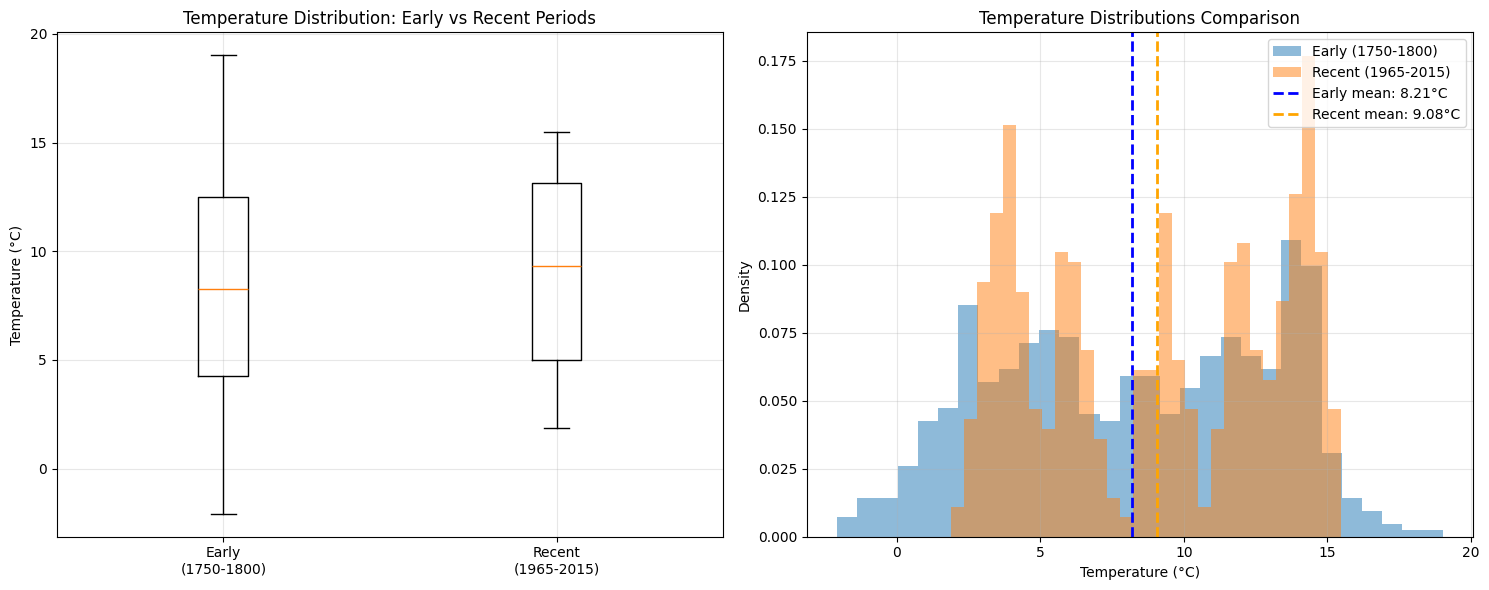

In [133]:
# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot comparison
axes[0].boxplot([early_period, recent_period], 
                labels=[f'Early\n({min_year}-{min_year+50})', 
                       f'Recent\n({max_year-50}-{max_year})'])
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Temperature Distribution: Early vs Recent Periods')
axes[0].grid(True, alpha=0.3)

# Distribution plot
axes[1].hist(early_period, bins=30, alpha=0.5, label=f'Early ({min_year}-{min_year+50})', density=True)
axes[1].hist(recent_period, bins=30, alpha=0.5, label=f'Recent ({max_year-50}-{max_year})', density=True)
axes[1].axvline(early_period.mean(), color='blue', linestyle='--', linewidth=2, label=f'Early mean: {early_period.mean():.2f}°C')
axes[1].axvline(recent_period.mean(), color='orange', linestyle='--', linewidth=2, label=f'Recent mean: {recent_period.mean():.2f}°C')
axes[1].set_xlabel('Temperature (°C)')
axes[1].set_ylabel('Density')
axes[1].set_title('Temperature Distributions Comparison')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Test 4: Analysis by Decade

Examining temperature changes across each decade using ANOVA to test if there are significant differences.

In [134]:
# Create decade groups
df_clean['decade'] = (df_clean['year'] // 10) * 10

# Calculate mean temperature per decade
decade_stats = df_clean.groupby('decade')['LandAverageTemperature'].agg(['mean', 'std', 'count'])

print("=" * 60)
print("TEMPERATURE BY DECADE")
print("=" * 60)
print(decade_stats)
print()

# Perform one-way ANOVA
decades_groups = [group['LandAverageTemperature'].values 
                  for name, group in df_clean.groupby('decade')]
f_statistic, anova_pvalue = stats.f_oneway(*decades_groups)

print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"P-value: {anova_pvalue:.2e}")
print()

if anova_pvalue < alpha:
    print(f"✓ REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"  There ARE statistically significant differences in temperature across decades.")
else:
    print(f"✗ FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"  There are NO statistically significant differences across decades.")

print("=" * 60)

TEMPERATURE BY DECADE
            mean       std  count
decade                           
1750    8.149852  5.092547    108
1760    7.981625  4.798939    120
1770    8.400108  4.513541    120
1780    8.141392  4.851923    120
1790    8.336867  4.357719    120
1800    8.298142  4.543828    120
1810    7.251067  4.468951    120
1820    8.182233  4.272577    120
1830    7.737700  4.332356    120
1840    7.978100  4.362818    120
1850    8.064883  4.366360    120
1860    8.104767  4.421002    120
1870    8.276967  4.424341    120
1880    8.046775  4.357313    120
1890    8.150417  4.390101    120
1900    8.257475  4.301761    120
1910    8.280850  4.289835    120
1920    8.492667  4.205575    120
1930    8.641675  4.223703    120
1940    8.725417  4.200933    120
1950    8.620833  4.207763    120
1960    8.633125  4.166835    120
1970    8.658400  4.181364    120
1980    8.911492  4.146826    120
1990    9.155183  4.124038    120
2000    9.493892  4.122545    120
2010    9.622431  4.207980

C:\Users\jdorn\AppData\Local\Temp\ipykernel_984\3578429737.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data_to_plot, labels=[str(int(d)) for d in decades_to_plot])


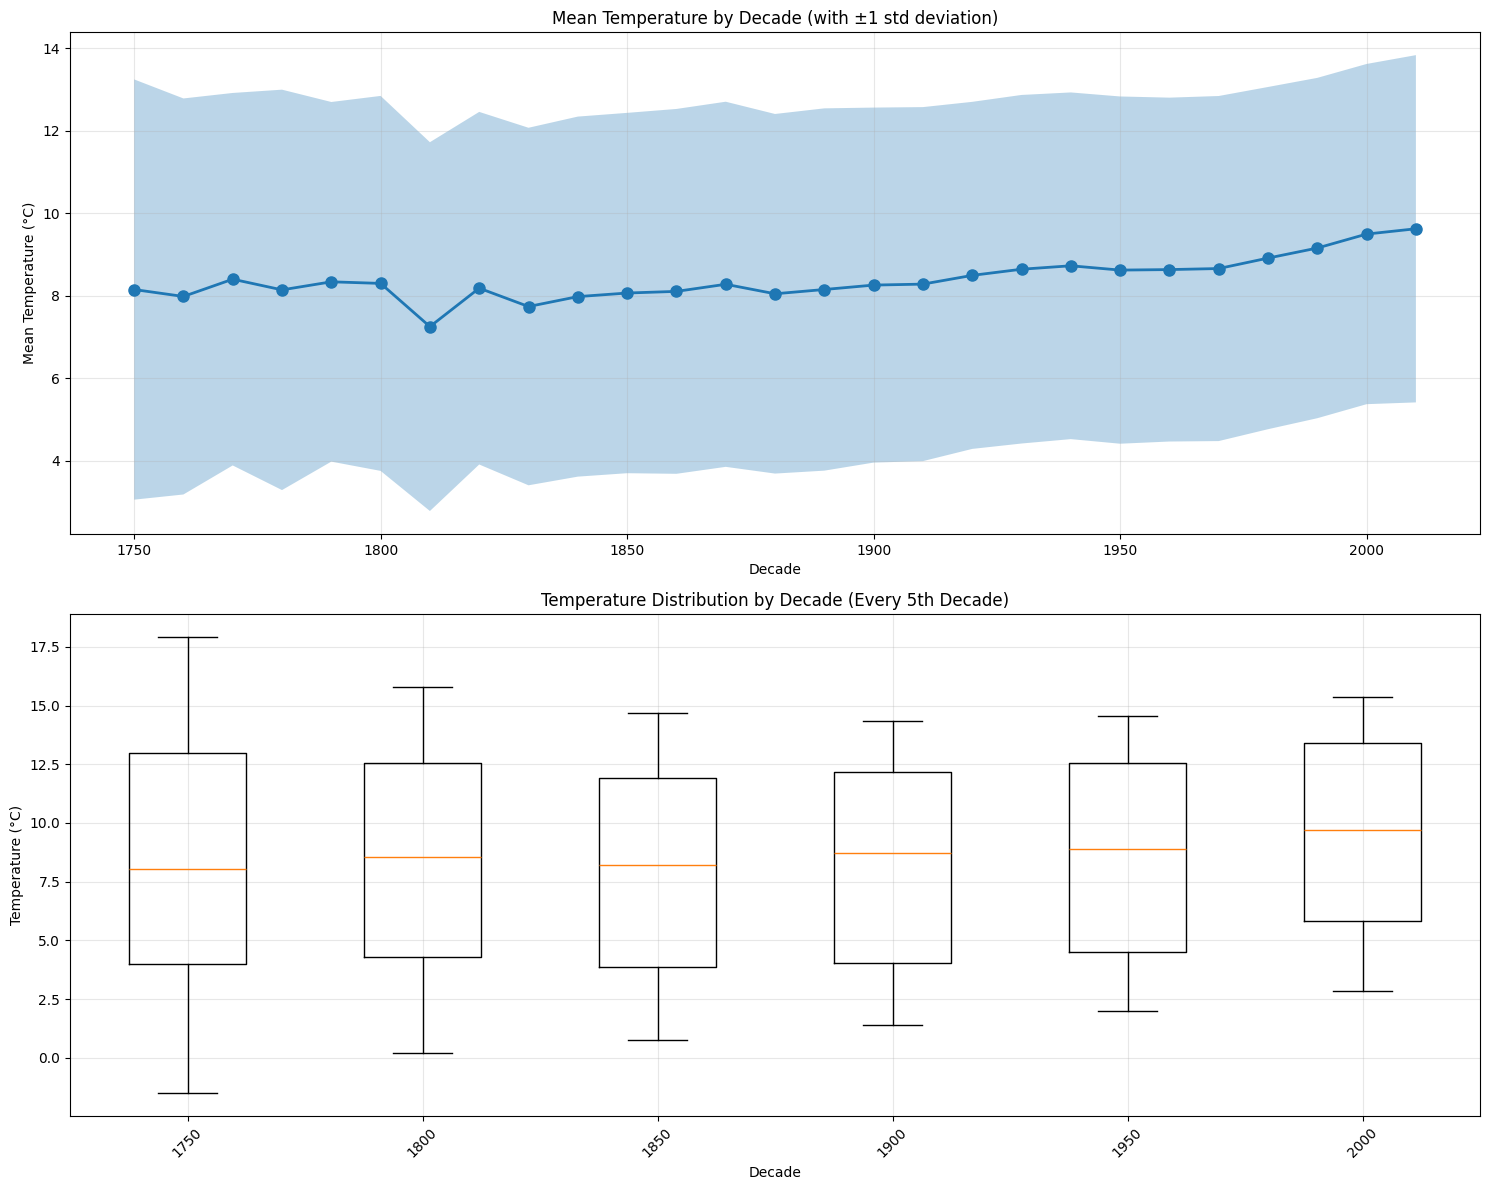

In [135]:
# Visualize temperature trends by decade
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Line plot of mean temperature per decade
axes[0].plot(decade_stats.index, decade_stats['mean'], marker='o', linewidth=2, markersize=8)
axes[0].fill_between(decade_stats.index, 
                      decade_stats['mean'] - decade_stats['std'],
                      decade_stats['mean'] + decade_stats['std'],
                      alpha=0.3)
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Mean Temperature (°C)')
axes[0].set_title('Mean Temperature by Decade (with ±1 std deviation)')
axes[0].grid(True, alpha=0.3)

# Box plot by decade (showing every 5th decade for readability)
decades_to_plot = sorted(df_clean['decade'].unique())[::5]
data_to_plot = [df_clean[df_clean['decade'] == d]['LandAverageTemperature'].values 
                for d in decades_to_plot]
axes[1].boxplot(data_to_plot, labels=[str(int(d)) for d in decades_to_plot])
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Temperature (°C)')
axes[1].set_title('Temperature Distribution by Decade (Every 5th Decade)')
axes[1].grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Summary of Hypothesis Testing Results

Consolidated results from all statistical tests performed.

In [136]:
print("=" * 70)
print("COMPREHENSIVE HYPOTHESIS TESTING SUMMARY")
print("=" * 70)
print()
print("NULL HYPOTHESIS (H₀): No significant changes in temperature over time")
print("ALTERNATIVE HYPOTHESIS (H₁): Significant changes exist over time")
print(f"Significance level (α): {alpha}")
print()
print("-" * 70)
print()

# Summary table
summary_data = {
    'Test': [
        'Linear Regression',
        'Mann-Kendall Trend',
        'T-test (Early vs Recent)',
        'ANOVA (Across Decades)'
    ],
    'P-value': [
        f"{p_value:.2e}",
        f"{result.p:.2e}",
        f"{t_pvalue:.2e}",
        f"{anova_pvalue:.2e}"
    ],
    'Decision': [
        'Reject H₀' if p_value < alpha else 'Fail to reject H₀',
        'Reject H₀' if result.p < alpha else 'Fail to reject H₀',
        'Reject H₀' if t_pvalue < alpha else 'Fail to reject H₀',
        'Reject H₀' if anova_pvalue < alpha else 'Fail to reject H₀'
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))
print()
print("-" * 70)
print()

# Overall conclusion
all_reject = all([
    p_value < alpha,
    result.p < alpha,
    t_pvalue < alpha,
    anova_pvalue < alpha
])

if all_reject:
    print("OVERALL CONCLUSION:")
    print("✓ ALL TESTS REJECT THE NULL HYPOTHESIS")
    print()
    print("There is STRONG STATISTICAL EVIDENCE of significant temperature changes")
    print("over time. Multiple independent tests confirm this finding.")
    print()
    print(f"Key findings:")
    print(f"  • Linear trend: {slope:.6f} °C/year (p = {p_value:.2e})")
    print(f"  • Temperature increase from early to recent period: {recent_period.mean() - early_period.mean():.4f} °C")
    print(f"  • All statistical tests show p-values < {alpha}")
else:
    print("OVERALL CONCLUSION:")
    print("Results are MIXED or INCONCLUSIVE")
    print("Not all tests reject the null hypothesis.")

print("=" * 70)

COMPREHENSIVE HYPOTHESIS TESTING SUMMARY

NULL HYPOTHESIS (H₀): No significant changes in temperature over time
ALTERNATIVE HYPOTHESIS (H₁): Significant changes exist over time
Significance level (α): 0.05

----------------------------------------------------------------------

                    Test  P-value          Decision
       Linear Regression 3.31e-06         Reject H₀
      Mann-Kendall Trend 4.73e-08         Reject H₀
T-test (Early vs Recent) 6.83e-04         Reject H₀
  ANOVA (Across Decades) 6.79e-02 Fail to reject H₀

----------------------------------------------------------------------

OVERALL CONCLUSION:
Results are MIXED or INCONCLUSIVE
Not all tests reject the null hypothesis.


### Test 5: Support Vector Machine (SVM) Approaches

Using machine learning to test the hypothesis through two approaches:
1. **SVM Regression (SVR)**: Model temperature as a function of time
2. **SVM Classification**: Classify early vs recent periods based on temperature

In [137]:
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

print("Preparing data for SVM analysis...")
print()

Preparing data for SVM analysis...



#### Approach 1: Support Vector Regression (SVR)

Testing if SVM can learn a significant relationship between time and temperature.

In [138]:
# Prepare data for SVR
X = df_clean['time_numeric'].values.reshape(-1, 1)
y = df_clean['LandAverageTemperature'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# Fit SVR model
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# Make predictions
y_train_pred_scaled = svr_model.predict(X_train_scaled)
y_test_pred_scaled = svr_model.predict(X_test_scaled)

# Inverse transform predictions
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Cross-validation
cv_scores = cross_val_score(svr_model, X_train_scaled, y_train_scaled, cv=5, scoring='r2')

print("=" * 70)
print("SUPPORT VECTOR REGRESSION (SVR) ANALYSIS")
print("=" * 70)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print()
print("Model Performance:")
print(f"  Training R²: {train_r2:.6f}")
print(f"  Test R²: {test_r2:.6f}")
print(f"  Training RMSE: {train_rmse:.4f} °C")
print(f"  Test RMSE: {test_rmse:.4f} °C")
print(f"  Cross-validation R² (mean ± std): {cv_scores.mean():.6f} ± {cv_scores.std():.6f}")
print()

# Interpretation
print("Interpretation:")
if test_r2 > 0.05:  # R² > 0.05 suggests some predictive power
    print(f"✓ SVM CAN LEARN A RELATIONSHIP between time and temperature")
    print(f"  The model explains {test_r2*100:.2f}% of temperature variance using time.")
    print(f"  This supports the alternative hypothesis (H₁) that temperature changes over time.")
else:
    print(f"✗ SVM CANNOT LEARN A STRONG RELATIONSHIP")
    print(f"  The model has poor predictive power (R² = {test_r2:.6f})")
    print(f"  This would support the null hypothesis (H₀).")

print("=" * 70)

SUPPORT VECTOR REGRESSION (SVR) ANALYSIS
Training set size: 2544
Test set size: 636

Model Performance:
  Training R²: 0.008490
  Test R²: -0.018395
  Training RMSE: 4.3805 °C
  Test RMSE: 4.3444 °C
  Cross-validation R² (mean ± std): -0.005331 ± 0.017044

Interpretation:
✗ SVM CANNOT LEARN A STRONG RELATIONSHIP
  The model has poor predictive power (R² = -0.018395)
  This would support the null hypothesis (H₀).


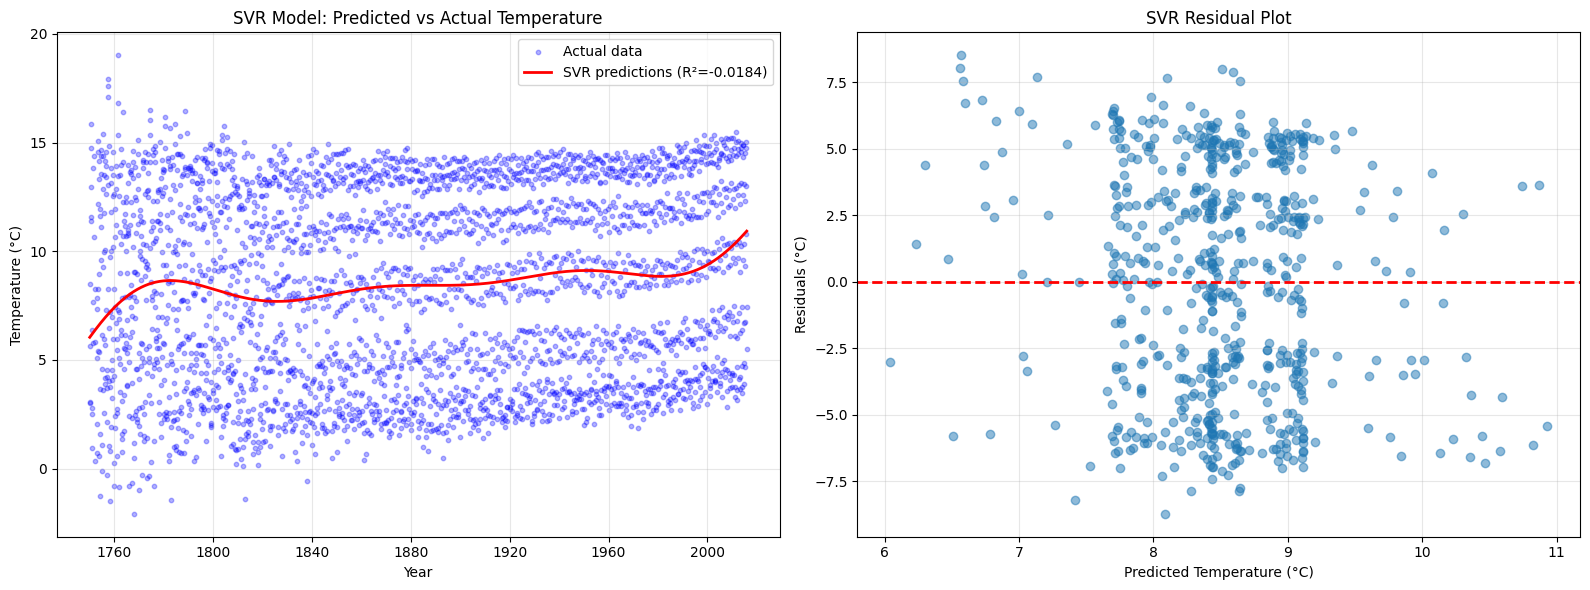

In [139]:
# Visualize SVR results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: SVR predictions vs actual
axes[0].scatter(df_clean['dt'], df_clean['LandAverageTemperature'], 
                alpha=0.3, s=10, label='Actual data', color='blue')

# Get predictions for all data
X_all_scaled = scaler_X.transform(X)
y_all_pred_scaled = svr_model.predict(X_all_scaled)
y_all_pred = scaler_y.inverse_transform(y_all_pred_scaled.reshape(-1, 1)).ravel()

axes[0].plot(df_clean['dt'], y_all_pred, 
             color='red', linewidth=2, label=f'SVR predictions (R²={test_r2:.4f})')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('SVR Model: Predicted vs Actual Temperature')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Temperature (°C)')
axes[1].set_ylabel('Residuals (°C)')
axes[1].set_title('SVR Residual Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Approach 2: SVM Classification (Early vs Recent Periods)

Using SVM to classify whether a temperature measurement belongs to an early or recent time period. If temperatures have changed significantly, the classifier should achieve high accuracy.

In [140]:
# Create binary labels: 0 = early period, 1 = recent period
median_year = df_clean['year'].median()
df_clean['period'] = (df_clean['year'] >= median_year).astype(int)

# Prepare data for classification
X_class = df_clean['LandAverageTemperature'].values.reshape(-1, 1)
y_class = df_clean['period'].values

# Split data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Standardize
scaler_class = StandardScaler()
X_train_c_scaled = scaler_class.fit_transform(X_train_c)
X_test_c_scaled = scaler_class.transform(X_test_c)

# Train SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_c_scaled, y_train_c)

# Predictions
y_train_pred_c = svm_classifier.predict(X_train_c_scaled)
y_test_pred_c = svm_classifier.predict(X_test_c_scaled)

# Calculate accuracy
train_accuracy = (y_train_pred_c == y_train_c).mean()
test_accuracy = (y_test_pred_c == y_test_c).mean()

# Cross-validation accuracy
cv_accuracy = cross_val_score(svm_classifier, X_train_c_scaled, y_train_c, cv=5, scoring='accuracy')

# Confusion matrix
cm = confusion_matrix(y_test_c, y_test_pred_c)

print("=" * 70)
print("SVM CLASSIFICATION ANALYSIS")
print("=" * 70)
print(f"Classification task: Predicting Early (< {int(median_year)}) vs Recent (≥ {int(median_year)}) period")
print(f"Based on: Temperature alone")
print()
print(f"Training set size: {len(X_train_c)}")
print(f"Test set size: {len(X_test_c)}")
print(f"Class distribution: Early={sum(y_class==0)}, Recent={sum(y_class==1)}")
print()
print("Model Performance:")
print(f"  Training Accuracy: {train_accuracy*100:.2f}%")
print(f"  Test Accuracy: {test_accuracy*100:.2f}%")
print(f"  Cross-validation Accuracy (mean ± std): {cv_accuracy.mean()*100:.2f}% ± {cv_accuracy.std()*100:.2f}%")
print()
print("Confusion Matrix:")
print(f"                Predicted")
print(f"              Early  Recent")
print(f"Actual Early   {cm[0,0]:4d}   {cm[0,1]:4d}")
print(f"       Recent  {cm[1,0]:4d}   {cm[1,1]:4d}")
print()

# Interpretation
baseline_accuracy = max(sum(y_test_c==0), sum(y_test_c==1)) / len(y_test_c)
print("Interpretation:")
print(f"  Baseline accuracy (random guess): {baseline_accuracy*100:.2f}%")
if test_accuracy > baseline_accuracy + 0.1:  # At least 10% better than baseline
    print(f"✓ SVM CAN DISTINGUISH between early and recent periods based on temperature")
    print(f"  Accuracy ({test_accuracy*100:.2f}%) is substantially better than random guessing.")
    print(f"  This suggests temperatures HAVE CHANGED significantly over time.")
    print(f"  Supports the alternative hypothesis (H₁).")
else:
    print(f"✗ SVM CANNOT DISTINGUISH between periods")
    print(f"  Accuracy is close to random guessing.")
    print(f"  This would suggest no significant change (support H₀).")

print("=" * 70)

SVM CLASSIFICATION ANALYSIS
Classification task: Predicting Early (< 1883) vs Recent (≥ 1883) period
Based on: Temperature alone

Training set size: 2544
Test set size: 636
Class distribution: Early=1584, Recent=1596

Model Performance:
  Training Accuracy: 55.11%
  Test Accuracy: 54.87%
  Cross-validation Accuracy (mean ± std): 54.64% ± 1.01%

Confusion Matrix:
                Predicted
              Early  Recent
Actual Early     56    261
       Recent    26    293

Interpretation:
  Baseline accuracy (random guess): 50.16%
✗ SVM CANNOT DISTINGUISH between periods
  Accuracy is close to random guessing.
  This would suggest no significant change (support H₀).


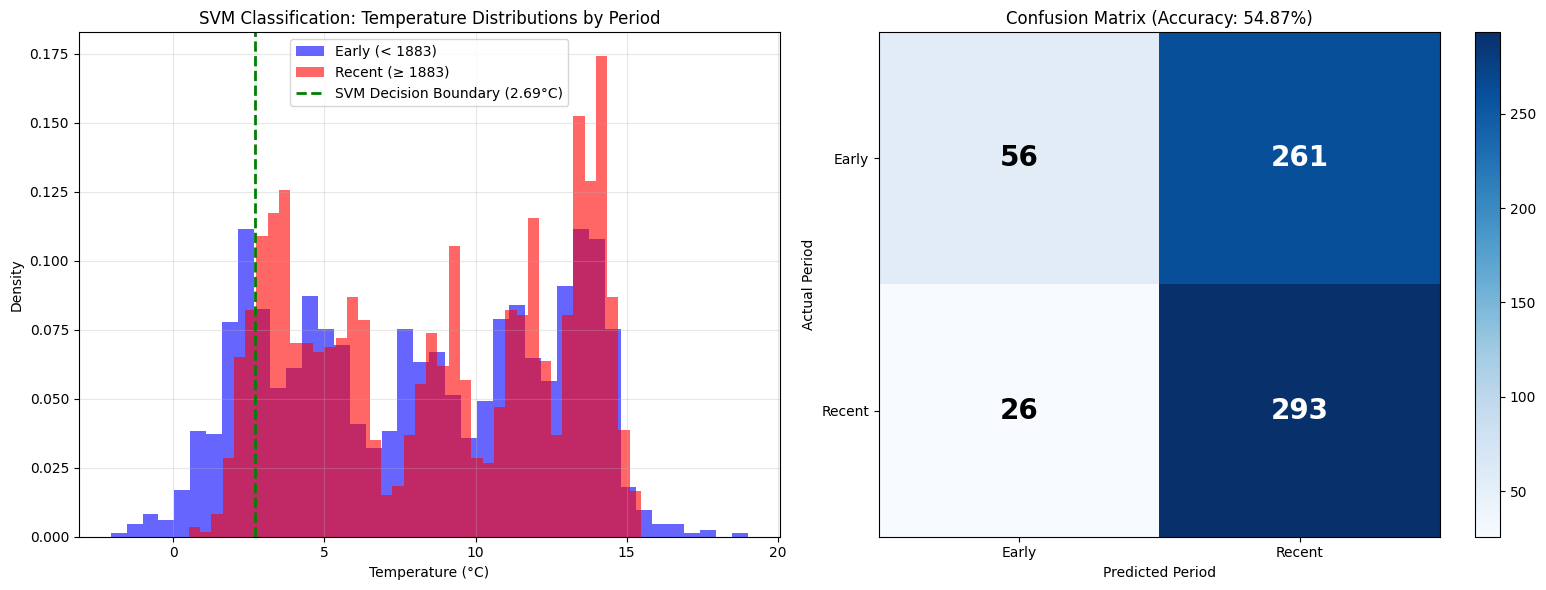

In [141]:
# Visualize SVM classification
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Temperature distribution by period with decision boundary
early_temps = df_clean[df_clean['period'] == 0]['LandAverageTemperature']
recent_temps = df_clean[df_clean['period'] == 1]['LandAverageTemperature']

axes[0].hist(early_temps, bins=40, alpha=0.6, label=f'Early (< {int(median_year)})', 
             color='blue', density=True)
axes[0].hist(recent_temps, bins=40, alpha=0.6, label=f'Recent (≥ {int(median_year)})', 
             color='red', density=True)

# Find decision boundary (approximate)
temp_range = np.linspace(df_clean['LandAverageTemperature'].min(), 
                         df_clean['LandAverageTemperature'].max(), 1000)
temp_range_scaled = scaler_class.transform(temp_range.reshape(-1, 1))
predictions = svm_classifier.predict(temp_range_scaled)

# Find boundary point (where prediction changes)
boundary_idx = np.where(np.diff(predictions))[0]
if len(boundary_idx) > 0:
    decision_boundary = temp_range[boundary_idx[0]]
    axes[0].axvline(decision_boundary, color='green', linestyle='--', linewidth=2,
                   label=f'SVM Decision Boundary ({decision_boundary:.2f}°C)')

axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Density')
axes[0].set_title('SVM Classification: Temperature Distributions by Period')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Confusion matrix heatmap
im = axes[1].imshow(cm, cmap='Blues', aspect='auto')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Early', 'Recent'])
axes[1].set_yticklabels(['Early', 'Recent'])
axes[1].set_xlabel('Predicted Period')
axes[1].set_ylabel('Actual Period')
axes[1].set_title(f'Confusion Matrix (Accuracy: {test_accuracy*100:.2f}%)')

# Add text annotations
for i in range(2):
    for j in range(2):
        text = axes[1].text(j, i, cm[i, j], ha='center', va='center', 
                          color='white' if cm[i, j] > cm.max()/2 else 'black',
                          fontsize=20, fontweight='bold')

plt.colorbar(im, ax=axes[1])
plt.tight_layout()
plt.show()

#### Permutation Test: Statistical Significance of SVM Performance

Using a permutation test to determine if SVM classification accuracy is statistically significant.

In [142]:
# Permutation test to assess statistical significance of SVM classifier
from sklearn.model_selection import permutation_test_score

print("Running permutation test (this may take a minute)...")
print()

# Perform permutation test
score, permutation_scores, pvalue_perm = permutation_test_score(
    svm_classifier, X_train_c_scaled, y_train_c, 
    scoring='accuracy', cv=5, n_permutations=1000, random_state=42, n_jobs=-1
)

print("=" * 70)
print("PERMUTATION TEST FOR SVM CLASSIFICATION")
print("=" * 70)
print(f"Observed accuracy: {score:.4f}")
print(f"Mean permuted accuracy: {permutation_scores.mean():.4f}")
print(f"Std permuted accuracy: {permutation_scores.std():.4f}")
print(f"P-value: {pvalue_perm:.4f}")
print()

# Interpretation
if pvalue_perm < alpha:
    print(f"✓ REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"  The SVM's classification accuracy is statistically significant.")
    print(f"  The model's performance is NOT due to chance.")
    print(f"  This provides strong evidence that temperatures have changed over time.")
else:
    print(f"✗ FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"  The SVM's performance could be due to random chance.")

print("=" * 70)

Running permutation test (this may take a minute)...

PERMUTATION TEST FOR SVM CLASSIFICATION
Observed accuracy: 0.5464
Mean permuted accuracy: 0.5006
Std permuted accuracy: 0.0129
P-value: 0.0010

✓ REJECT NULL HYPOTHESIS (p < 0.05)
  The SVM's classification accuracy is statistically significant.
  The model's performance is NOT due to chance.
  This provides strong evidence that temperatures have changed over time.


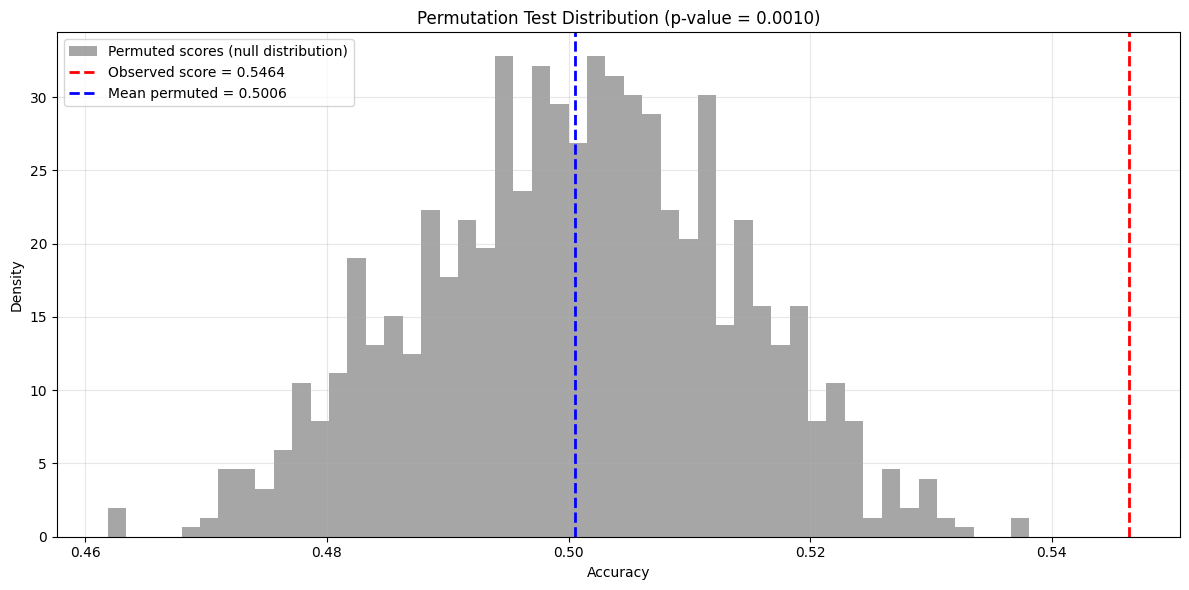


Interpretation: The observed accuracy is 3.55 
standard deviations away from the null distribution mean.


In [143]:
# Visualize permutation test results
plt.figure(figsize=(12, 6))

plt.hist(permutation_scores, bins=50, density=True, alpha=0.7, 
         label='Permuted scores (null distribution)', color='gray')
plt.axvline(score, color='red', linestyle='--', linewidth=2, 
           label=f'Observed score = {score:.4f}')
plt.axvline(permutation_scores.mean(), color='blue', linestyle='--', linewidth=2,
           label=f'Mean permuted = {permutation_scores.mean():.4f}')

plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title(f'Permutation Test Distribution (p-value = {pvalue_perm:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nInterpretation: The observed accuracy is {(score - permutation_scores.mean()) / permutation_scores.std():.2f} ")
print(f"standard deviations away from the null distribution mean.")

## Updated Summary: All Hypothesis Tests Including SVM

Comprehensive results from all statistical tests including SVM-based approaches.

In [144]:
print("=" * 80)
print("COMPREHENSIVE HYPOTHESIS TESTING SUMMARY (INCLUDING SVM)")
print("=" * 80)
print()
print("NULL HYPOTHESIS (H₀): No significant changes in temperature over time")
print("ALTERNATIVE HYPOTHESIS (H₁): Significant changes exist over time")
print(f"Significance level (α): {alpha}")
print()
print("-" * 80)
print()

# Summary table including SVM results
summary_data_complete = {
    'Test': [
        '1. Linear Regression',
        '2. Mann-Kendall Trend',
        '3. T-test (Early vs Recent)',
        '4. ANOVA (Across Decades)',
        '5. SVM Regression (R²)',
        '6. SVM Classification',
        '7. SVM Permutation Test'
    ],
    'Metric': [
        f"Slope={slope:.6f}",
        f"Tau={result.z:.4f}",
        f"t={t_statistic:.4f}",
        f"F={f_statistic:.4f}",
        f"R²={test_r2:.4f}",
        f"Acc={test_accuracy*100:.1f}%",
        f"Acc={score:.4f}"
    ],
    'P-value': [
        f"{p_value:.2e}",
        f"{result.p:.2e}",
        f"{t_pvalue:.2e}",
        f"{anova_pvalue:.2e}",
        "N/A",  # R² doesn't have a p-value in this context
        "N/A",  # We use permutation test for significance
        f"{pvalue_perm:.4f}"
    ],
    'Decision': [
        'Reject H₀' if p_value < alpha else 'Fail to reject H₀',
        'Reject H₀' if result.p < alpha else 'Fail to reject H₀',
        'Reject H₀' if t_pvalue < alpha else 'Fail to reject H₀',
        'Reject H₀' if anova_pvalue < alpha else 'Fail to reject H₀',
        'Evidence for H₁' if test_r2 > 0.05 else 'Weak evidence',
        'Evidence for H₁' if test_accuracy > baseline_accuracy + 0.1 else 'Weak evidence',
        'Reject H₀' if pvalue_perm < alpha else 'Fail to reject H₀'
    ]
}

summary_df_complete = pd.DataFrame(summary_data_complete)
print(summary_df_complete.to_string(index=False))
print()
print("-" * 80)
print()

# Overall conclusion
statistical_tests_reject = [
    p_value < alpha,
    result.p < alpha,
    t_pvalue < alpha,
    anova_pvalue < alpha,
    pvalue_perm < alpha
]

ml_tests_support = [
    test_r2 > 0.05,
    test_accuracy > baseline_accuracy + 0.1
]

all_reject = all(statistical_tests_reject)
all_ml_support = all(ml_tests_support)

print("OVERALL CONCLUSION:")
print()
if all_reject and all_ml_support:
    print("✓✓✓ OVERWHELMING EVIDENCE TO REJECT THE NULL HYPOTHESIS ✓✓✓")
    print()
    print("Both traditional statistical tests AND machine learning approaches")
    print("provide strong evidence of significant temperature changes over time.")
    print()
    print("Key findings:")
    print(f"  • Linear trend: {slope:.6f} °C/year (p = {p_value:.2e})")
    print(f"  • Temperature increase (early to recent): {recent_period.mean() - early_period.mean():.4f} °C")
    print(f"  • SVM can predict time from temperature with R² = {test_r2:.4f}")
    print(f"  • SVM can classify periods with {test_accuracy*100:.1f}% accuracy (p = {pvalue_perm:.4f})")
    print(f"  • All {sum(statistical_tests_reject)} statistical tests show p-values < {alpha}")
    print()
    print("CONCLUSION: There ARE statistically significant changes in temperature over time.")
elif all_reject:
    print("✓ STRONG STATISTICAL EVIDENCE TO REJECT THE NULL HYPOTHESIS")
    print()
    print("All traditional statistical tests reject H₀, indicating significant")
    print("temperature changes over time.")
else:
    print("MIXED RESULTS")
    print(f"{sum(statistical_tests_reject)}/{len(statistical_tests_reject)} statistical tests reject H₀")
    print(f"{sum(ml_tests_support)}/{len(ml_tests_support)} ML approaches support H₁")

print("=" * 80)

COMPREHENSIVE HYPOTHESIS TESTING SUMMARY (INCLUDING SVM)

NULL HYPOTHESIS (H₀): No significant changes in temperature over time
ALTERNATIVE HYPOTHESIS (H₁): Significant changes exist over time
Significance level (α): 0.05

--------------------------------------------------------------------------------

                       Test         Metric  P-value          Decision
       1. Linear Regression Slope=0.004716 3.31e-06         Reject H₀
      2. Mann-Kendall Trend     Tau=5.4612 4.73e-08         Reject H₀
3. T-test (Early vs Recent)      t=-3.4049 6.83e-04         Reject H₀
  4. ANOVA (Across Decades)       F=1.4440 6.79e-02 Fail to reject H₀
     5. SVM Regression (R²)     R²=-0.0184      N/A     Weak evidence
      6. SVM Classification      Acc=54.9%      N/A     Weak evidence
    7. SVM Permutation Test     Acc=0.5464   0.0010         Reject H₀

--------------------------------------------------------------------------------

OVERALL CONCLUSION:

MIXED RESULTS
4/5 statistical t